In [1]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For AutoML - BM3D')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)


In [3]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_test.npy"

In [4]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

/tmp/ipykernel_3301256/3175755324.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-22 01:13:35,322:Client-EnsembleBuilder] No runs were available to build an ensemble from
Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.3798076923076923
Mean Squared Error: 0.62


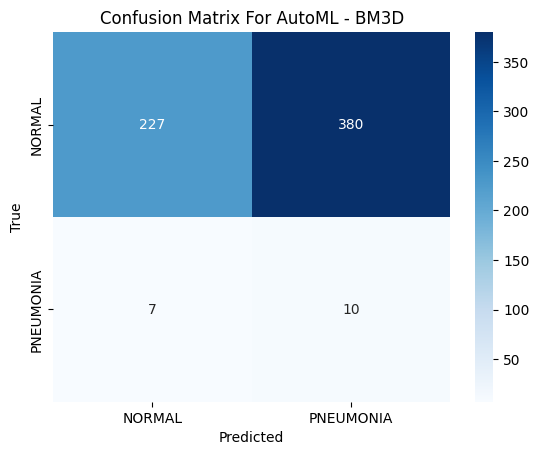

              precision    recall  f1-score   support

      NORMAL       0.37      0.97      0.54       234
   PNEUMONIA       0.59      0.03      0.05       390

    accuracy                           0.38       624
   macro avg       0.48      0.50      0.29       624
weighted avg       0.51      0.38      0.23       624

auto-sklearn results:
  Dataset name: cf18c643-88b2-11ee-9f88-b496916b807c
  Metric: accuracy
  Best validation score: 0.969222
  Number of target algorithm runs: 38
  Number of successful target algorithm runs: 11
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 22
  Number of target algorithms that exceeded the memory limit: 5



In [5]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### Experimenting on 100 Features

In [6]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_test.npy"

In [7]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

/tmp/ipykernel_3301256/3175755324.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.3894230769230769
Mean Squared Error: 0.61


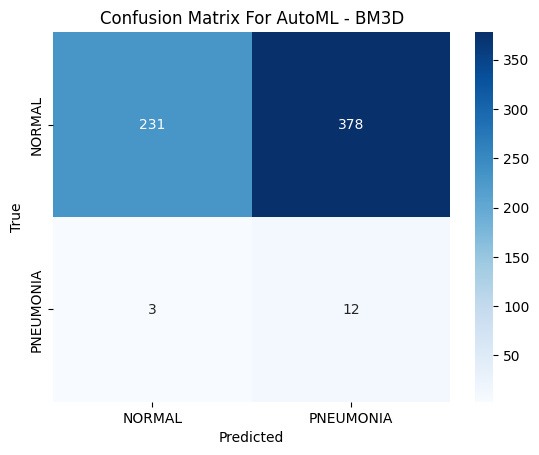

              precision    recall  f1-score   support

      NORMAL       0.38      0.99      0.55       234
   PNEUMONIA       0.80      0.03      0.06       390

    accuracy                           0.39       624
   macro avg       0.59      0.51      0.30       624
weighted avg       0.64      0.39      0.24       624

auto-sklearn results:
  Dataset name: 15928835-88b3-11ee-9f88-b496916b807c
  Metric: accuracy
  Best validation score: 0.968060
  Number of target algorithm runs: 33
  Number of successful target algorithm runs: 19
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 10
  Number of target algorithms that exceeded the memory limit: 4



In [8]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### LDA

In [9]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [10]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

/tmp/ipykernel_3301256/3587930905.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-22 01:17:34,548:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:17:35,233:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:17:35,453:Client-EnsembleBuilder] No runs were available to build an ensemble from
Validation Accuracy: 0.4375
Mean Squared Error: 0.56
Test Accuracy: 0.38782051282051283
Mean Squared Error: 0.61


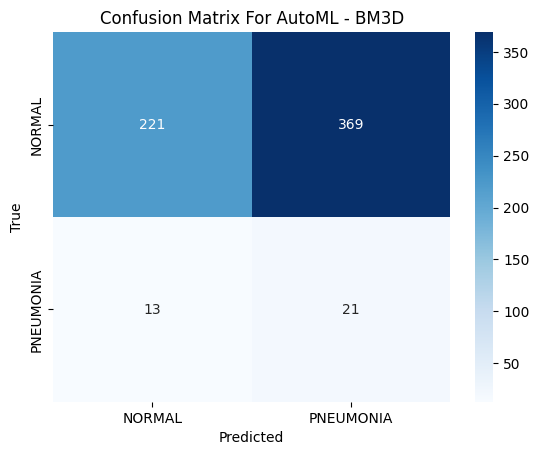

              precision    recall  f1-score   support

      NORMAL       0.37      0.94      0.54       234
   PNEUMONIA       0.62      0.05      0.10       390

    accuracy                           0.39       624
   macro avg       0.50      0.50      0.32       624
weighted avg       0.53      0.39      0.26       624

auto-sklearn results:
  Dataset name: 60265e10-88b3-11ee-9f88-b496916b807c
  Metric: accuracy
  Best validation score: 0.966318
  Number of target algorithm runs: 42
  Number of successful target algorithm runs: 30
  Number of crashed target algorithm runs: 12
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [11]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_lda, y_train)
    y_pred_val = automl_classifier.predict(X_val_lda)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_lda, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### PCA

In [19]:
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_train_pca.shape)
print(X_val_pca.shape)
print(X_test_pca.shape)

(5216, 16)
(16, 16)
(624, 16)


Validation Accuracy: 0.375
Mean Squared Error: 0.62
Test Accuracy: 0.5721153846153846
Mean Squared Error: 0.43


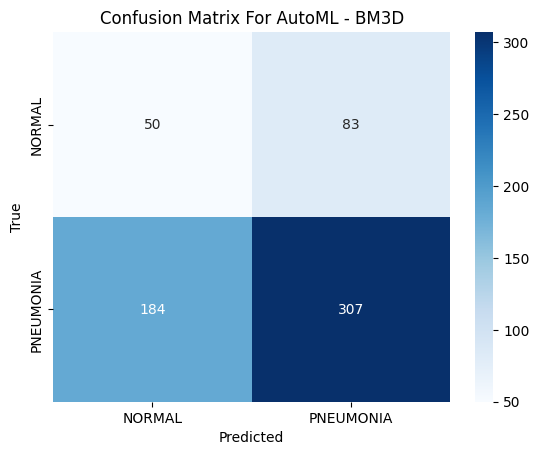

              precision    recall  f1-score   support

      NORMAL       0.38      0.21      0.27       234
   PNEUMONIA       0.63      0.79      0.70       390

    accuracy                           0.57       624
   macro avg       0.50      0.50      0.48       624
weighted avg       0.53      0.57      0.54       624

auto-sklearn results:
  Dataset name: aaf7aad6-88b3-11ee-9f88-b496916b807c
  Metric: accuracy
  Best validation score: 0.948316
  Number of target algorithm runs: 46
  Number of successful target algorithm runs: 34
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 11
  Number of target algorithms that exceeded the memory limit: 0



In [15]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_pca, y_train)
    y_pred_val = automl_classifier.predict(X_val_pca)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_pca, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### T-SNE

In [16]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

[WARNING] [2023-11-22 01:24:30,961:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
Validation Accuracy: 0.3125
Mean Squared Error: 0.69
Test Accuracy: 0.5689102564102564
Mean Squared Error: 0.43


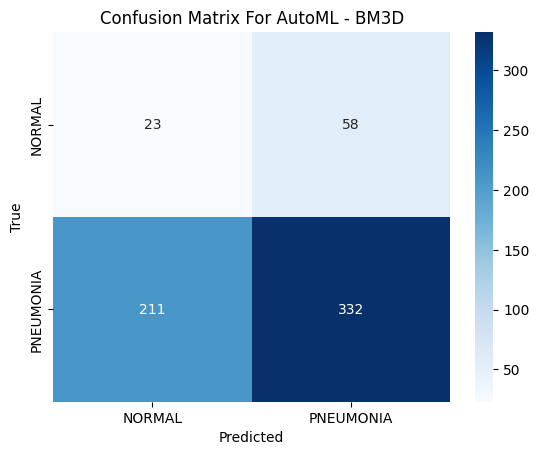

              precision    recall  f1-score   support

      NORMAL       0.28      0.10      0.15       234
   PNEUMONIA       0.61      0.85      0.71       390

    accuracy                           0.57       624
   macro avg       0.45      0.47      0.43       624
weighted avg       0.49      0.57      0.50       624

auto-sklearn results:
  Dataset name: 56ff5dc6-88b4-11ee-9f88-b496916b807c
  Metric: accuracy
  Best validation score: 0.946574
  Number of target algorithm runs: 40
  Number of successful target algorithm runs: 37
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [17]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_tsne, y_train)
    y_pred_val = automl_classifier.predict(X_val_tsne)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_tsne, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

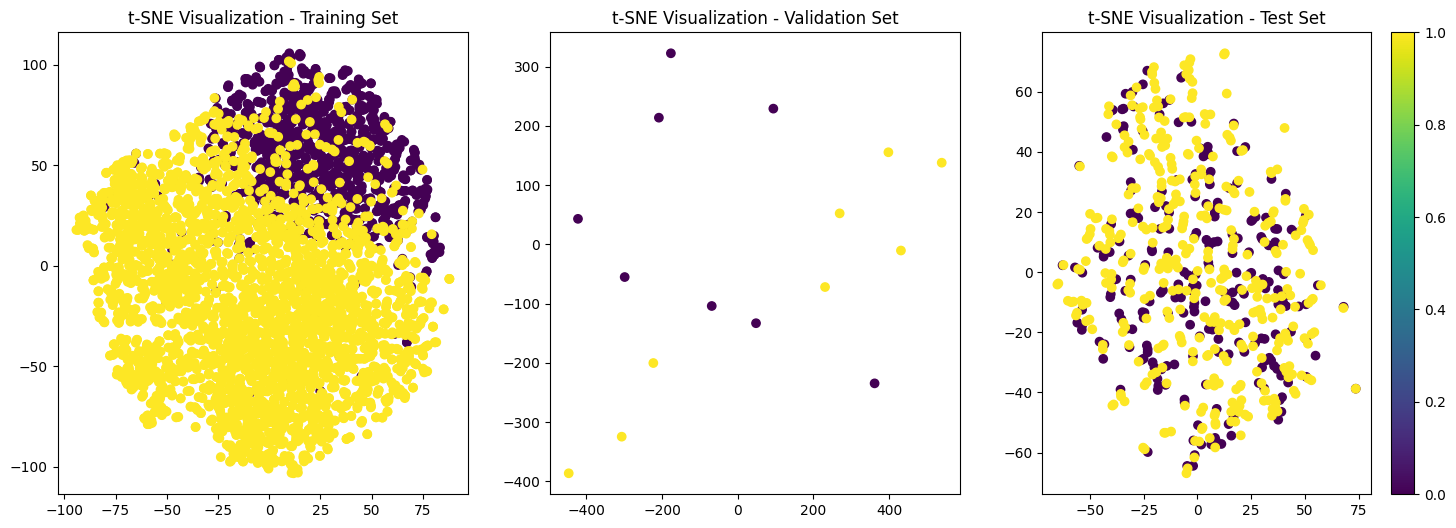

In [18]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()